In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

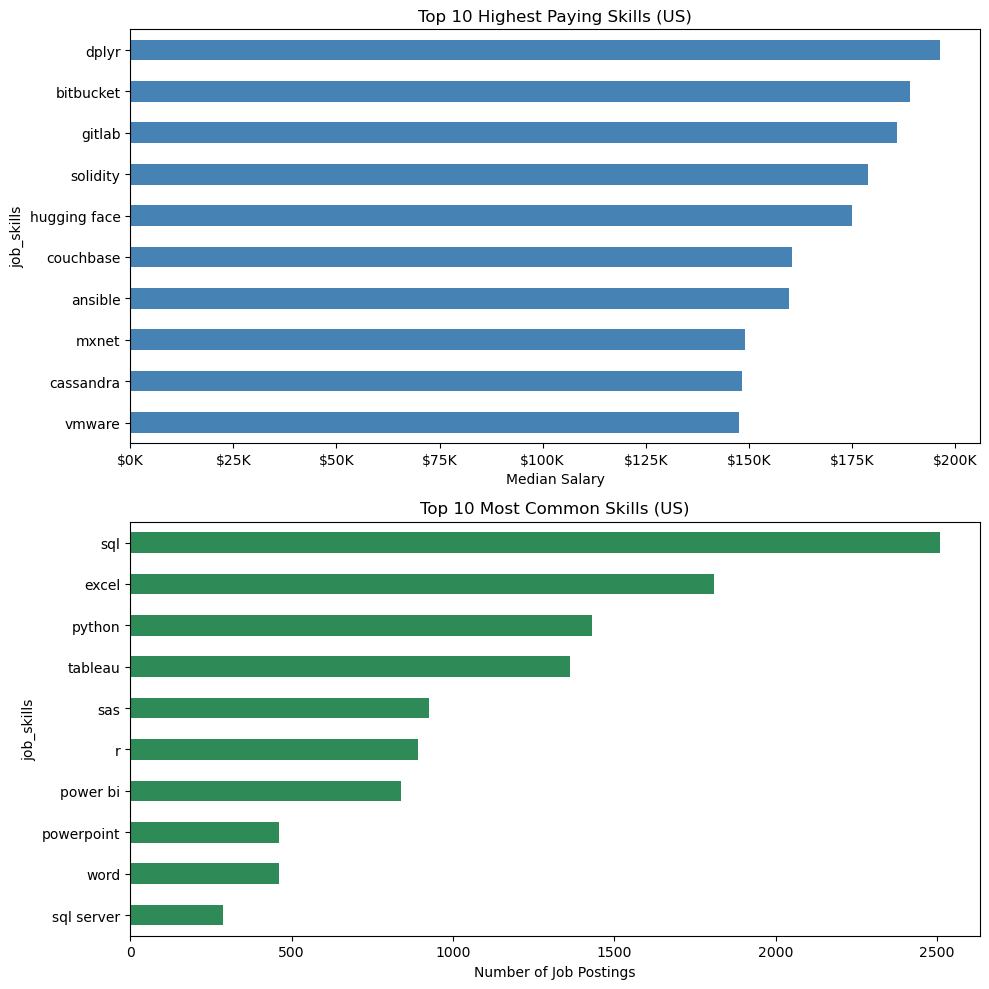

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter  # ✅ Add this

# Assuming df_da_us_group is already created
df_da_us_pay = df_da_us_group.sort_values(by='median', ascending=False)
df_da_skills = df_da_us_group.sort_values(by='count', ascending=False)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Top 10 highest paying skills
df_da_us_pay.head(10).plot(kind='barh', y='median', ax=ax[0], color='steelblue', legend=False)
ax[0].set_title('Top 10 Highest Paying Skills (US)')
ax[0].set_xlabel('Median Salary')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].invert_yaxis()

# Top 10 most common skills
df_da_skills.head(10).plot(kind='barh', y='count', ax=ax[1], color='seagreen', legend=False)
ax[1].set_title('Top 10 Most Common Skills (US)')
ax[1].set_xlabel('Number of Job Postings')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()
